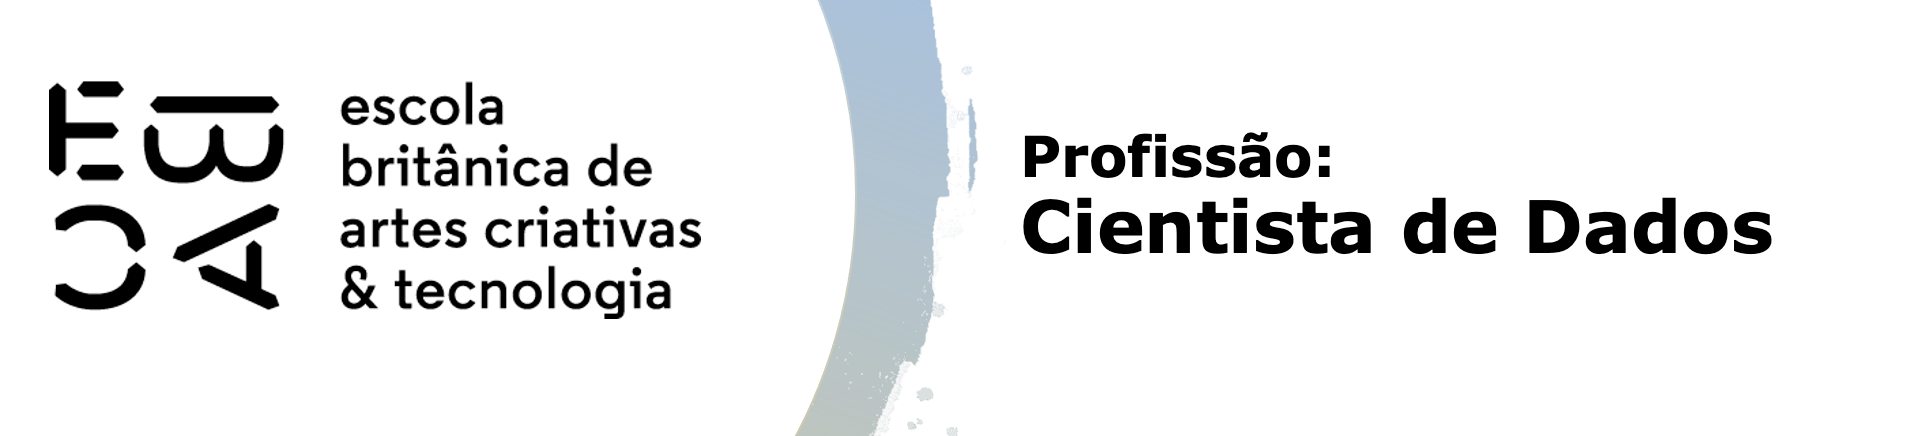

# Módulo 33 - Inferência 
# Tarefa

> Nesta tarefa encontram-se questões relacionadas ao conteúdo do módulo 33, onde há destaque para a utilização da estimativa-t, com esta adequada para medidas que não apresentam desvio padrão fixo $\sigma$. Para demonstrar a aplicação dela, será usado o dataset de pinguins do pacote seaborn, na qual será comparado o peso corporal dos pinguins de acordo com seu sexo e espécie.

### 0. Carregamento de Pacotes
> Os pacotes necessários para esta tarefa são:
> - numpy, para aplicações vetoriais e algébricas aos dados;
> - stats do pacote scipy, que contém comandos próprios para análises estatísticas;
> - pandas, para a leitura e edição de dadosç
> - matplotlib.pyplot, que permite a produção de gráficos;
> - seaborn, para o carregamento de dados dos pinguins.

In [82]:
import numpy as np
import scipy.stats as st

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 0.1. Carregamento dos Dados 
> 
> Agora que os pacotes foram carregados, será chamado o dataset 'penguins' do seaborn, na qual encontram-se as informações sobre espécie, sexo, peso corporal e outros fatores sobre cada pinguim.

In [83]:
# Carrega o dataset 'penguins', identificando-o como "pg"
pg = sns.load_dataset('penguins')
pg

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


> Para que não hajam erros na análise, verifiquemos se há dados faltantes na tabela. Caso hajam, vamos removê-los.

In [84]:
# Conta o número de dados faltantes em cada coluna
pg.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [85]:
# Remove as linhas com dados faltantes da tabela
pg = pg.dropna()

> Agora que foi feita a limpeza de dados, vejamos algumas características, tais como quais espécies estão presentes na tabela, quantidade de pinguins de cada sexo e seus respectivos pesos corporais médios.

In [86]:
# Faz a contagem de pinguins de cada espécie
pg.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [87]:
# Conta o número de pinguins de cada sexo e devolve informações sobre seus pesos
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

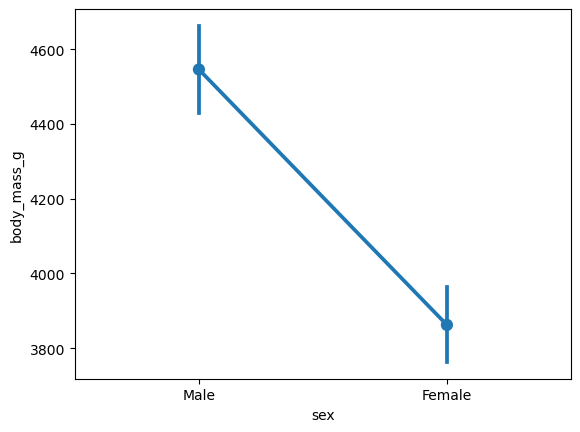

In [88]:
# Gráfico de peso médio com desvio padrão para cada sexo de pinguim
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

# Questões

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

> ### Fazendo o teste
>
>O teste-t consiste em calcular a estatistica *t* e compará-la com a distribuição *t* padrão, com *n-1* graus de liberdade. A estatística *t* pode ser calculada pela seguinte fórmula:
>
>$$ t=\frac{\bar{x_1}-\bar{x_2}}{S_{x_1x_2}\sqrt{\frac{2}{n}}} $$
>
>Sendo que:
>
>$$ S_{x_1x_2} = \sqrt{\frac{S_{x_1}^2 +S_{x_2}^2}{2}} $$
>
> No caso, as informações de cada $x_i$ estão relacionadas a determinado sexo do pinguim.
>
>A estatística *t*, **sob $H_0$** tem a seguinte distribuição:
>
>$$ t \sim t(n-2) $$
>
> Nesta questão, a **$H_0$** é a hipótese de que a diferença entre os pesos de cada sexo é nula, ou seja, pesos semelhantes para ambos os sexos; a $H_a$ é a de que os pinguins machos apresentam maior peso corporal do que os pinguins fêmeas, concordando com o gráfico visto na seção 0.1.
>
>O código abaixo replica a fórmula do teste-t. 

In [133]:
desvpad = pg.groupby('sex')['body_mass_g'].var().mean()**.5 # Valor do S_x1_x2 
Media_M = pg.groupby('sex')['body_mass_g'].mean()['Male'] # Massa corporal média de pinguins masculinos
Media_F = pg.groupby('sex')['body_mass_g'].mean()['Female'] # Massa corporal média de pinguins femininas

n = pg.shape[0] # número total de pinguins analisados
nm = pg[pg['sex']=="Male"].shape[0] # número de pinguins machos
nf = pg[pg['sex']=="Female"].shape[0] # número de pinguins fêmeas
diferenca = Media_M - Media_F # Numerador da fórmula
erro_padrao = desvpad*((1/nm + 1/nf)**.5) # variância amostral*raiz(2/n)
t = diferenca/erro_padrao     # Estatística do teste
RC = st.t.ppf(.95, n-2)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, n-2)     # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferenca:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.17f} ou mais')

diferença: 683.41
desvio padrão: 729.43
erro padrão: 79.95
estatística do teste: 8.55
região crítica: 1.65 ou mais
p-value: 0.00000000000000022 ou mais


> Os resultados mostram que:
>
> estatística t > região crítica;
>
> p-value < 5%;
>
> Dessa forma, podemos rejeitar a $H_0$.

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

A probabilidade para valores entre 1,65 e inf é de 5,00%


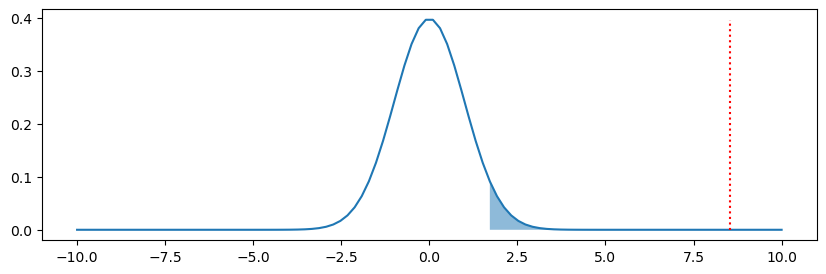

In [146]:
fig, ax = plt.subplots(figsize=(10,3))

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de X e Y para plotar a densidade
x = np.linspace(mu - 10*sigma, mu + 10*sigma, 100)
y = st.t.pdf(x, n-2)

# low = início da região crítica do teste
low = st.t.ppf(.95, n-2)
high = np.inf

# Gráfico da densidade
ax.plot(x, y)
# Esta linha de referência marca o valor observado da estatística do teste
ax.vlines(x=[t], 
             ymin=0, ymax=y.max(), 
             colors='r', linestyles='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, n-2) - st.t.cdf(low, n-2)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

> Na seção 0.1, vimos que há três espécies de pinguins sendo analisadas: _Adelie_, _Gentoo_ e _Chinstrap_. Vamos separar cada uma delas em novos dataframes e analisá-las tal como no exercício 1. 

In [147]:
adelie = pg[pg['species'] == 'Adelie'] # Dataframe com os dados da espécie Adelie
gentoo = pg[pg['species'] == 'Gentoo'] # Dataframe com os dados da espécie Gentoo
chinstrap =  pg[pg['species'] == 'Chinstrap'] # Dataframe com os dados da espécie Chinstrap

In [92]:
adelie.groupby('sex')['body_mass_g'].describe() # Descrição da massa corporal por sexo da espécie Adelie 

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,73.0,3368.835616,269.380102,2850.0,3175.0,3400.0,3550.0,3900.0
Male,73.0,4043.493151,346.811553,3325.0,3800.0,4000.0,4300.0,4775.0


In [93]:
gentoo.groupby('sex')['body_mass_g'].describe() # Descrição da massa corporal por sexo da espécie Gentoo

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,58.0,4679.741379,281.578294,3950.0,4462.5,4700.0,4875.0,5200.0
Male,61.0,5484.836066,313.158596,4750.0,5300.0,5500.0,5700.0,6300.0


In [94]:
chinstrap.groupby('sex')['body_mass_g'].describe() # Descrição da massa corporal por sexo da espécie Chinstrap

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,34.0,3527.205882,285.333912,2700.0,3362.50,3550.0,3693.75,4150.0
Male,34.0,3938.970588,362.137550,3250.0,3731.25,3950.0,4100.00,4800.0


> ### Teste-t para a Espécie Adelie

In [138]:
desvpad_a = adelie.groupby('sex')['body_mass_g'].var().mean()**.5
Media_M_a = adelie.groupby('sex')['body_mass_g'].mean()['Male']
Media_F_a = adelie.groupby('sex')['body_mass_g'].mean()['Female']

n_a = adelie.shape[0] # número total de pinguins analisados
nm_a = adelie[adelie['sex']=="Male"].shape[0] # número de pinguins machos
nf_a = adelie[adelie['sex']=="Female"].shape[0] # número de pinguins fêmeas
diferenca_a = Media_M_a - Media_F_a # Numerador da fórmula
erro_padrao_a = desvpad_a*((1/nm_a + 1/nf_a)**.5) # variância amostral*raiz(2/n)
t_a = diferenca_a/erro_padrao_a     # Estatística do teste
RC_a = st.t.ppf(.95, n_a-2)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value_a=1-st.t.cdf(t_a, n_a-2)     # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferenca_a:.2f}')
print(f'desvio padrão: {desvpad_a:.2f}')
print(f'erro padrão: {erro_padrao_a:.2f}')
print(f'estatística do teste: {t_a:.2f}')
print(f'região crítica: {RC_a:.2f} ou mais')
print(f'p-value: {p_value_a} ou mais')

diferença: 674.66
desvio padrão: 310.52
erro padrão: 51.40
estatística do teste: 13.13
região crítica: 1.66 ou mais
p-value: 0.0 ou mais


> ### Teste-t para a Espécie Gentoo

In [140]:
desvpad_g = gentoo.groupby('sex')['body_mass_g'].var().mean()**.5
Media_M_g = gentoo.groupby('sex')['body_mass_g'].mean()['Male']
Media_F_g = gentoo.groupby('sex')['body_mass_g'].mean()['Female']

n_g = gentoo.shape[0] # número total de pinguins analisados
nm_g = gentoo[gentoo['sex']=="Male"].shape[0] # número de pinguins machos
nf_g = gentoo[gentoo['sex']=="Female"].shape[0] # número de pinguins fêmeas
diferenca_g = Media_M_g - Media_F_g # Numerador da fórmula
erro_padrao_g = desvpad_g*((1/nm_g + 1/nf_g)**.5) # variância amostral*raiz(2/n)
t_g = diferenca_g/erro_padrao_g     # Estatística do teste
RC_g = st.t.ppf(.95, n_g-2)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value_g = 1-st.t.cdf(t_g, n_g-2)     # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferenca_g:.2f}')
print(f'desvio padrão: {desvpad_g:.2f}')
print(f'erro padrão: {erro_padrao_g:.2f}')
print(f'estatística do teste: {t_g:.2f}')
print(f'região crítica: {RC_g:.2f} ou mais')
print(f'p-value: {p_value_g} ou mais')

diferença: 805.09
desvio padrão: 297.79
erro padrão: 54.61
estatística do teste: 14.74
região crítica: 1.66 ou mais
p-value: 0.0 ou mais


> ### Teste-t para a Espécie Chinstrap

In [143]:
desvpad_c = chinstrap.groupby('sex')['body_mass_g'].var().mean()**.5
Media_M_c = chinstrap.groupby('sex')['body_mass_g'].mean()['Male']
Media_F_c = chinstrap.groupby('sex')['body_mass_g'].mean()['Female']

n_c = chinstrap.shape[0] # número total de pinguins analisados
nm_c = chinstrap[chinstrap['sex']=="Male"].shape[0] # número de pinguins machos
nf_c = chinstrap[chinstrap['sex']=="Female"].shape[0] # número de pinguins fêmeas
diferenca_c = Media_M_c - Media_F_c # Numerador da fórmula
erro_padrao_c = desvpad_c*((1/nm_c + 1/nf_c)**.5) # variância amostral*raiz(2/n)
t_c = diferenca_c/erro_padrao_c     # Estatística do teste
RC_c = st.t.ppf(.95, n_c-2)        # Região crítica: sob h0, t está na RC 5% das vezes
p_value_c = 1-st.t.cdf(t_c, n_c-2)     # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferenca_c:.2f}')
print(f'desvio padrão: {desvpad_c:.2f}')
print(f'erro padrão: {erro_padrao_c:.2f}')
print(f'estatística do teste: {t_c:.2f}')
print(f'região crítica: {RC_c:.2f} ou mais')
print(f'p-value: {p_value_c:.7f} ou mais')

diferença: 411.76
desvio padrão: 326.01
erro padrão: 79.07
estatística do teste: 5.21
região crítica: 1.67 ou mais
p-value: 0.0000010 ou mais


> Neste exercício, vimos que todas as espécies apresentaram estatística do teste superior à região crítica e p-value < 5% (nas espécies Adelie e Gentoo, o valor foi 0). Dessa forma, em todas elas podemos rejeitar a hipótese nula, na qual a massa corporal dos pinguins machos são semelhantes à das pinguins fêmeas. 